Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [ ]:
count = 0
n = 1000000000 #Arbitratily large number

for num in range(2, n):
    prime = True
    for i in range(2, int(num ** .5) + 1):
        if (num % i == 0):
            prime = False
    if prime:
        count = count + 1

        if count % 2 != 0: #Saves half the run time as x = 2 if count is even
          #print(num, count)
          if count > 21000: #No reason to waste time computing when we know its not close to 10^10

            x = ((num - 1)**(count) + (num + 1)**(count)) % (num**2)

            if x > 10**10:
             print(num, count, x)
             break # 237737 21035 10001595590



237737 21035 10001595590


# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [3]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


Linear Regression
[ 4.33333407e-01  9.29324337e-03 -9.86433739e-02  5.93215487e-01
 -7.56192502e-06 -4.74516383e-03 -4.21449336e-01 -4.34166041e-01]
-36.85856910680128
RMSE 0.7273129773603114
MAE 0.535126133655451
R^2 0.5943232652466202


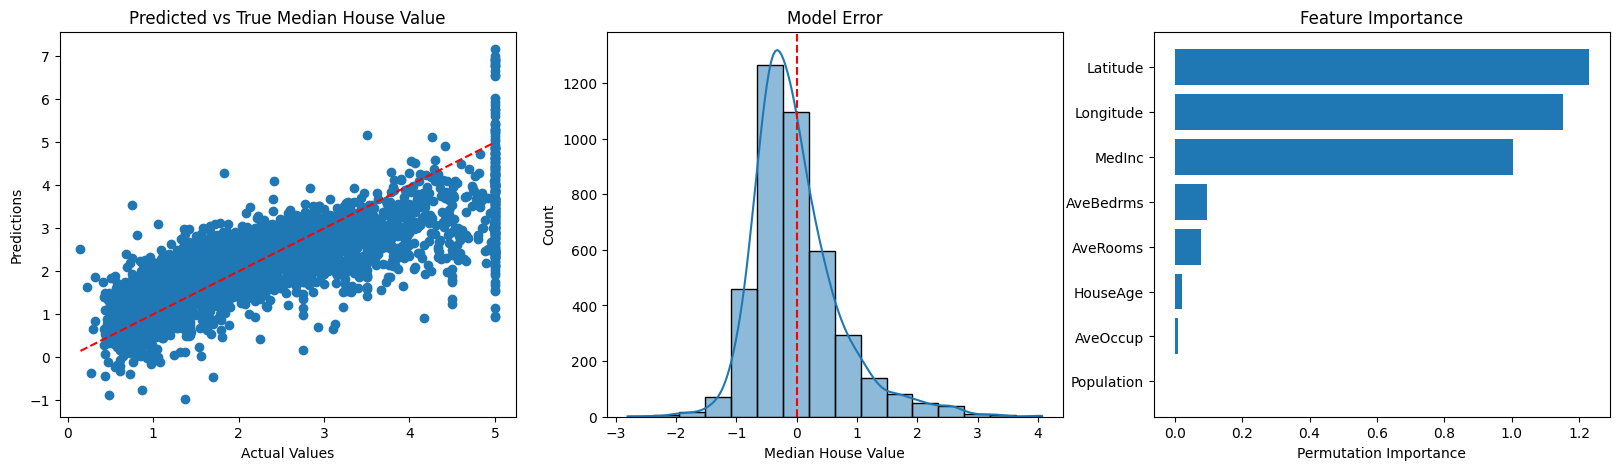

        col1       col2      corr
0   AveRooms  AveBedrms  0.847621
1  AveBedrms   AveRooms  0.847621
2   Latitude  Longitude -0.924664
3  Longitude   Latitude -0.924664
Linear Regression without Average Bedrooms
[ 3.71405852e-01  9.54885393e-03  1.72865535e-02 -6.54475952e-06
 -4.98186114e-03 -4.56237190e-01 -4.63613007e-01]
-38.88755945123658
RMSE 0.7414501124382504
MAE 0.5469621508822178
R^2 0.5783993232750744


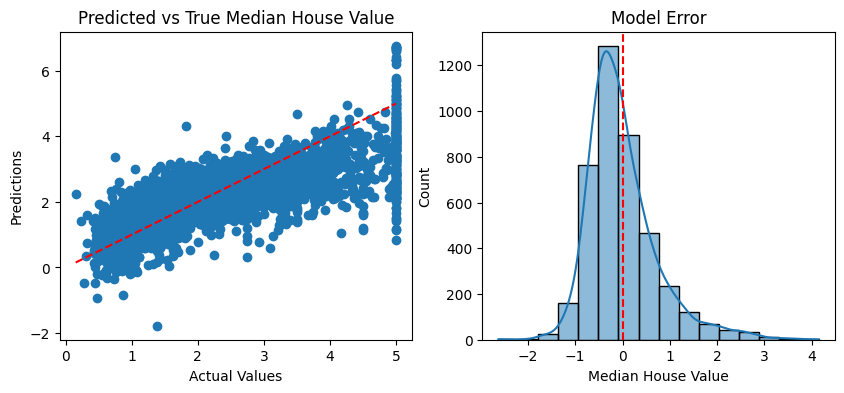

Linear Model
[ 2.91943072e-01  1.19988906e-02  0.00000000e+00 -0.00000000e+00
  9.56627848e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
0.5838073508514816
RMSE 0.8565038833628376
MAE 0.6598148298320917
R^2 0.43740469788231284


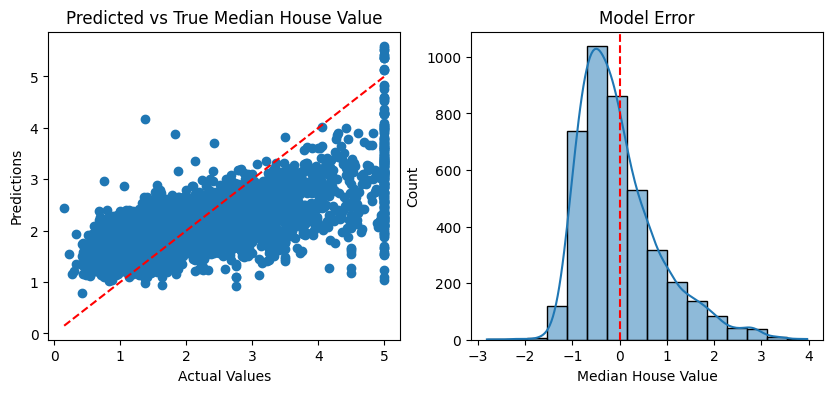

In [19]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, Lasso

#Linear Regression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print('Linear Regression')
print(reg.coef_)
print(reg.intercept_)
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE", mean_absolute_error(y_test, y_pred))
print("R^2", r2_score(y_test, y_pred))

feature_importance = permutation_importance(reg, X_test, y_test)
features = np.array(feature_names)
sorted_idx = feature_importance.importances_mean.argsort()

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 3)
plt.barh(features[sorted_idx], feature_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title('Feature Importance')

plt.subplot(1, 3, 2)
sns.histplot(y_test - y_pred, bins=16, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Median House Value')
plt.title('Model Error')

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Predicted vs True Median House Value')
plt.show()


# #Lets find if any features are hightly correlated.
corr_m = X.corr()
high_corr_features = [(col1, col2, corr_m.loc[col1, col2])
                      for col1 in corr_m.columns
                      for col2 in corr_m.columns
                      if col1 != col2 and abs(corr_m.loc[col1, col2]) > 0.8]
colldf = pd.DataFrame(high_corr_features, columns=['col1', 'col2', 'corr'])
print(colldf)

# #This shows that Average Rooms and Average Bedrooms are hightly correlated. Lets Drop Average Bedrooms and redo the Linear Regression.

W = pd.DataFrame(cal.data, columns=cal.feature_names).drop(columns=["AveBedrms"])
v = cal.target
W_train, W_test, v_train, v_test = train_test_split(W, v, test_size=0.20, random_state=0)
model = LinearRegression()
model.fit(W_train, v_train)
v_pred = model.predict(W_test)

reg_C = LinearRegression()
reg_C.fit(W_train, v_train)
v_pred = reg_C.predict(W_test)

print('Linear Regression without Average Bedrooms')
print(reg_C.coef_)
print(reg_C.intercept_)
print("RMSE", np.sqrt(mean_squared_error(v_test, v_pred)))
print("MAE", mean_absolute_error(v_test, v_pred))
print("R^2", r2_score(v_test, v_pred))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)
sns.histplot(v_test - v_pred, bins=16, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Median House Value')
plt.title('Model Error')

plt.subplot(1, 2, 1)
plt.scatter(v_test, v_pred)
plt.plot([min(v_test), max(v_test)], [min(v_test), max(v_test)], color = 'red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Predicted vs True Median House Value')
plt.show()

#Linear Model

reg_L = Lasso(alpha=0.5)
reg_L.fit(X_train, y_train)
y_pred_L = reg_L.predict(X_test)

print('Linear Model')
print(reg_L.coef_)
print(reg_L.intercept_)
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred_L)))
print("MAE", mean_absolute_error(y_test, y_pred_L))
print("R^2", r2_score(y_test, y_pred_L))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_L, bins=16, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Model Error')
plt.xlabel('Median House Value')

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_L)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Predicted vs True Median House Value')
plt.show()

# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


SVC Accuracy Score 0.9649122807017544
ROC AUC Score 0.9623015873015873
Average Precision Score 0.9627599090318388
              precision    recall  f1-score   support

   malignant       0.95      0.95      0.95        42
      benign       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

[[40  2]
 [ 2 70]]


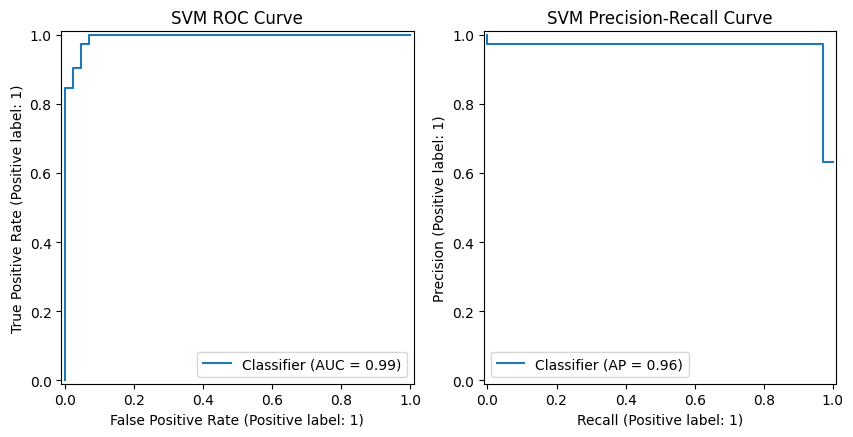

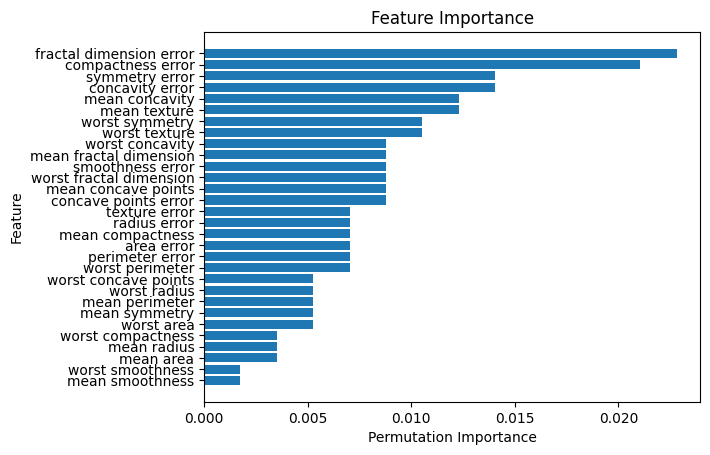

LR Accuracy Score 0.9824561403508771
ROC AUC Score 0.9761904761904762
Average Precision Score 0.972972972972973
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        42
      benign       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[[40  2]
 [ 0 72]]


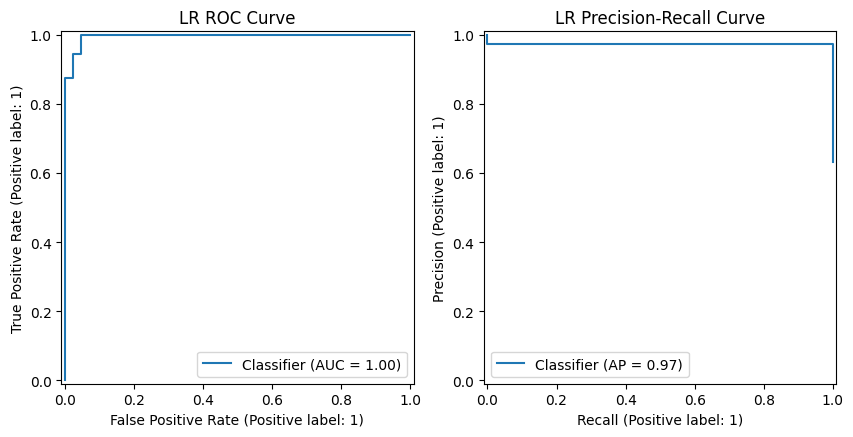

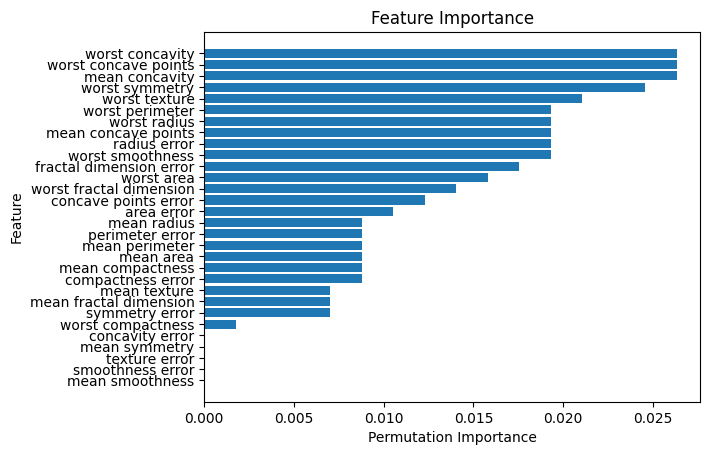

KNN Accuracy Score 0.956140350877193
ROC AUC Score 0.945436507936508
Average Precision Score 0.9422904483430798
              precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[38  4]
 [ 1 71]]


In [27]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance

# Support Vector Machine
svc_model = SVC()
svc_model.fit(X_train_std, y_train)

y_pred = svc_model.predict(X_test_std)
y_score = svc_model.decision_function(X_test_std)

print("SVC Accuracy Score",accuracy_score(y_test, y_pred))
print("ROC AUC Score",roc_auc_score(y_test, y_pred))
print("Average Precision Score",average_precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=data.target_names))
print(confusion_matrix(y_test, y_pred))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title("SVM ROC Curve")
ax2.set_title("SVM Precision-Recall Curve")
RocCurveDisplay.from_predictions(y_test, y_score, ax=ax1)
PrecisionRecallDisplay.from_predictions(y_test, y_pred, ax=ax2)
plt.show()

#Feature Importance for SVC
feature_importance = permutation_importance(svc_model, X_test_std, y_test)
features = np.array(feature_names)
sorted_idx = feature_importance.importances_mean.argsort()

plt.figure
plt.barh(features[sorted_idx], feature_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title('Feature Importance')
plt.show()

# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train_std, y_train)

y_pred_LR = LR.predict(X_test_std)
y_score_LR = LR.decision_function(X_test_std)

print("LR Accuracy Score", accuracy_score(y_test, y_pred_LR))
print("ROC AUC Score",roc_auc_score(y_test, y_pred_LR))
print("Average Precision Score",average_precision_score(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR, target_names=data.target_names))
print(confusion_matrix(y_test, y_pred_LR))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title("LR ROC Curve")
ax2.set_title("LR Precision-Recall Curve")
RocCurveDisplay.from_predictions(y_test, y_score_LR, ax=ax1)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_LR, ax=ax2)
plt.show()

#Feature Importance for LR
feature_importance_LR = permutation_importance(LR, X_test_std, y_test)
sorted_idx_LR = feature_importance_LR.importances_mean.argsort()

plt.figure
plt.barh(features[sorted_idx_LR], feature_importance_LR.importances_mean[sorted_idx_LR])
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title('Feature Importance')
plt.show()

# K-Nearest Neighbors
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train_std, y_train)

y_pred_KNN = KNN.predict(X_test_std)
y_score_KNN = KNN.predict_proba(X_test_std)

print("KNN Accuracy Score", accuracy_score(y_test, y_pred_KNN))
print("ROC AUC Score",roc_auc_score(y_test, y_pred_KNN))
print("Average Precision Score",average_precision_score(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN, target_names=data.target_names))
print(confusion_matrix(y_test, y_pred_KNN))

#Makes a rudimentary ROC Curve Plot
#fpr, tpr, thresholds = roc_curve(y_test, y_score_KNN[:, 1])
#roc_auc = auc(fpr, tpr)
#plt.plot(fpr, tpr)
#plt.show()